In [53]:
import pandas as pd
import sklearn
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# for visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database
db = pd.read_csv("diabetes.csv")
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


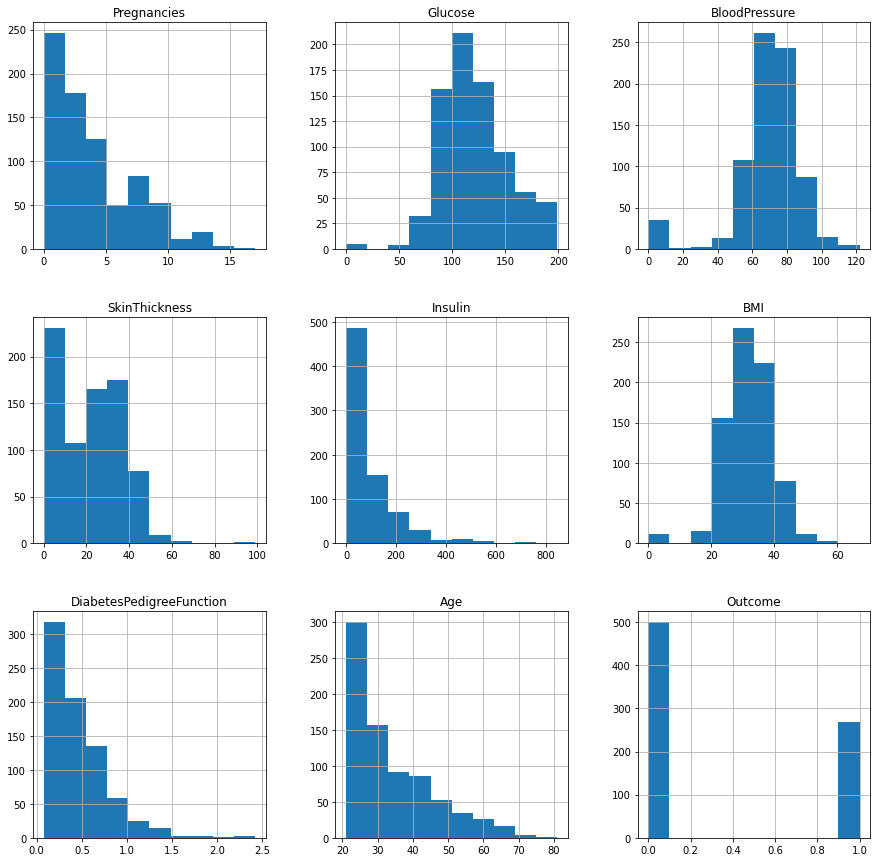

In [5]:
db.hist(figsize=(15,15))
plt.show()

In [6]:
# replacing 0-value with mean

for c in ["Glucose", "BloodPressure","SkinThickness"]:
    db[c].replace(0,db[c].mean(),inplace=True)

In [7]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Figure size 1080x1080 with 0 Axes>

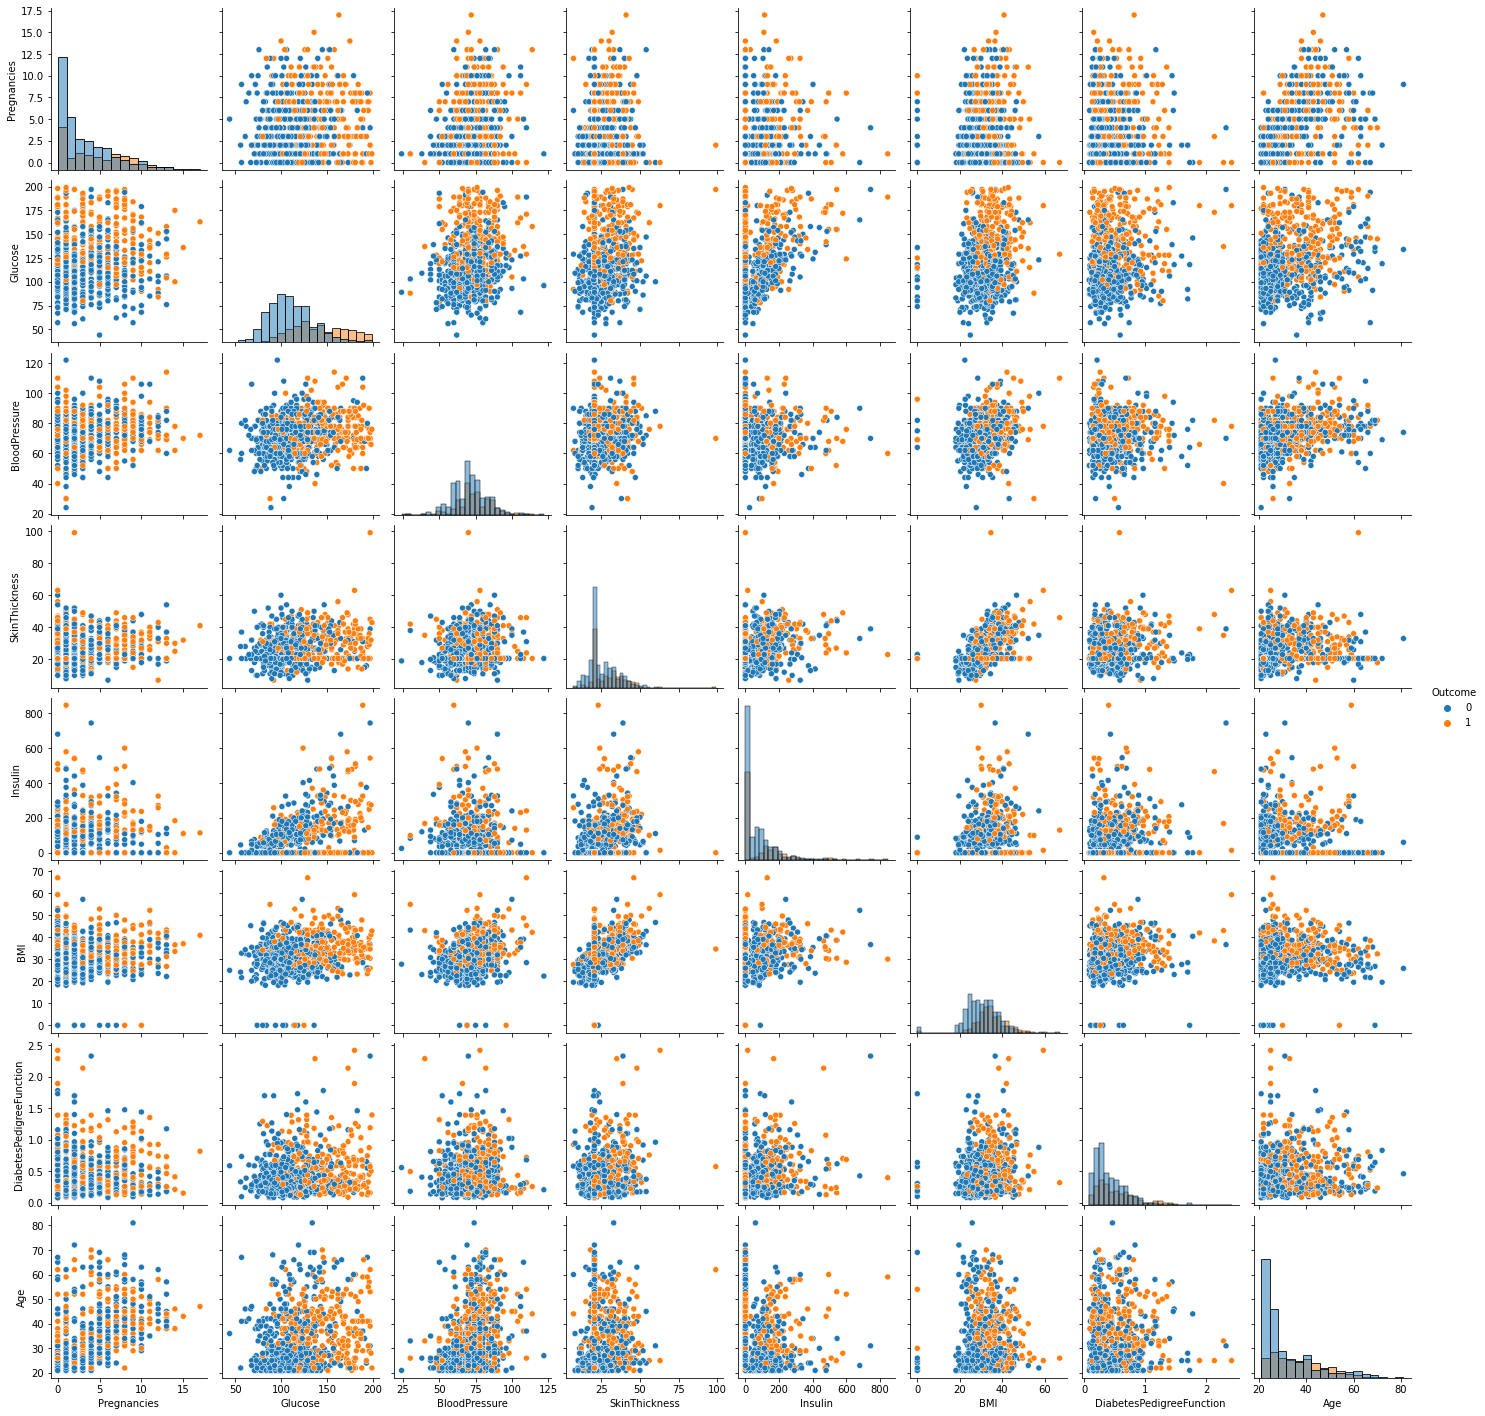

In [52]:
plt.figure(figsize=(15,15))
sb.pairplot(data=db, hue="Outcome", diag_kind="hist")
plt.savefig("data_pairpllot.png")
plt.show()

In [9]:
# saperate X, and y (data and target)
X = db.iloc[:,:-1]
y = db.iloc[:,-1]

In [10]:
print("Output cout of 0:",db.Outcome[db.Outcome == 0].count())
print("Output cout of 1:",db.Outcome[db.Outcome == 1].count())

Output cout of 0: 500
Output cout of 1: 268


In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(ratio=1)
X_res, y_res = ros.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [59]:
X_res.shape, y_res.shape

((1000, 8), (1000,))

In [12]:
# scale the value and split into training & test set 
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)

pd.DataFrame(X_train,columns=db.columns[:-1]).describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,3.951250,127.304341,73.125273,27.162096,85.652500,32.852750,0.480191,33.876250
std,3.471879,31.708313,12.649909,9.597924,121.578734,7.884348,0.325294,11.454691
min,0.000000,56.000000,24.000000,7.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,102.000000,66.000000,20.536458,0.000000,28.400000,0.254000,24.000000
50%,3.000000,123.000000,72.000000,24.000000,38.500000,32.800000,0.392000,31.000000
75%,6.000000,147.000000,80.000000,33.000000,135.000000,37.200000,0.637750,41.000000
max,15.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,70.000000


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [19]:
def predictAndVisualize(CLF,X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test,
                    visualize=True):
    
    # fit and predict data
    CLF.fit(X_train,y_train)
    y_pred = CLF.predict(X_test)
    acc_sc = accuracy_score(y_test,y_pred)
    
    
    # to visualize result
    if visualize:
        matrix = confusion_matrix(y_test, y_pred)
        sb.heatmap(matrix, annot=True)
        plt.ylabel("True Value")
        plt.xlabel("Prediction")
        plt.show()
        print("Accuracy: {:.2f}%".format(acc_sc*100))
    
    return acc_sc

In [31]:
def crossValidate(CLF,X=X_res,y=y_res,fold=10):
    sc = cross_val_score(CLF,X,y,cv=fold)
    mean = sc.mean()
    print("CV Mean Accuracy: {:.2f}%".format(mean*100))
    return mean

In [42]:
# Importing All the Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB #MultinomialNB, ComplementNB, CategoricalNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


# Creating a DataFrame for storing Accuracy of models
models_acc = pd.DataFrame({"Model":[],"Accuracy":[],"CV Accuracy":[]})


In [43]:
#to ignore inline warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

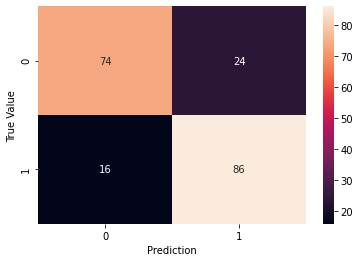

Accuracy: 80.00%
CV Mean Accuracy: 82.90%


In [44]:
# For KNNClassifier

knnCLF = KNeighborsClassifier(n_neighbors=1)
accuracy = predictAndVisualize(CLF=knnCLF)
CVacc = crossValidate(knnCLF)

models_acc = models_acc.append({"Model":"KNN","Accuracy":accuracy,"CV Accuracy":CVacc},ignore_index=True)

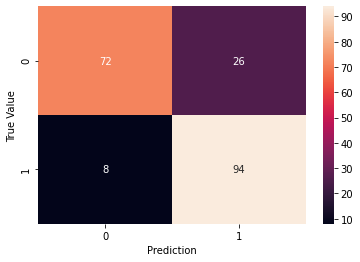

Accuracy: 83.00%
CV Mean Accuracy: 84.00%


In [45]:
#For Decision Tree Classifier
dtCLF = DecisionTreeClassifier()
accuracy = predictAndVisualize(CLF=dtCLF)
CVacc = crossValidate(dtCLF)

models_acc = models_acc.append({"Model":"Decision Tree","Accuracy":accuracy,"CV Accuracy":CVacc},ignore_index=True)

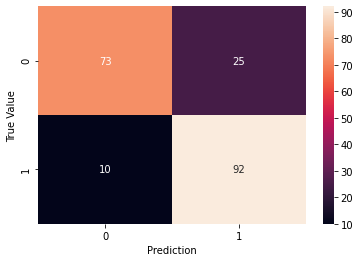

Accuracy: 82.50%
CV Mean Accuracy: 85.20%


In [46]:
# For Randomforest classifier

rfCLF = RandomForestClassifier(max_depth=9)
accuracy = predictAndVisualize(CLF=rfCLF)
CVacc = crossValidate(rfCLF)

models_acc = models_acc.append({"Model":"Random Forest","Accuracy":accuracy,"CV Accuracy":CVacc},ignore_index=True)

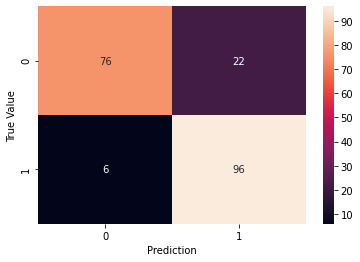

Accuracy: 86.00%
CV Mean Accuracy: 75.60%


In [47]:
# For Logistic Regression
logiCLF = LogisticRegression(max_iter=250)
accuracy = predictAndVisualize(CLF=rfCLF)
CVacc = crossValidate(logiCLF)

models_acc = models_acc.append({"Model":"Logistic Regression","Accuracy":accuracy,"CV Accuracy":CVacc},ignore_index=True)

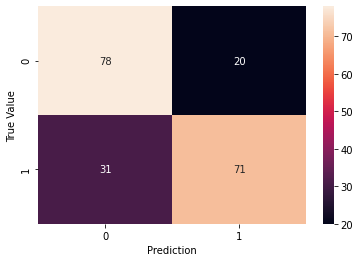

Accuracy: 74.50%
CV Mean Accuracy: 72.90%


In [48]:
# for GaussianNB classifier
gnbCLF = GaussianNB()
accuracy = predictAndVisualize(CLF=gnbCLF)
CVacc = crossValidate(gnbCLF)

models_acc = models_acc.append({"Model":"Gaussian NB","Accuracy":accuracy,"CV Accuracy":CVacc},ignore_index=True)

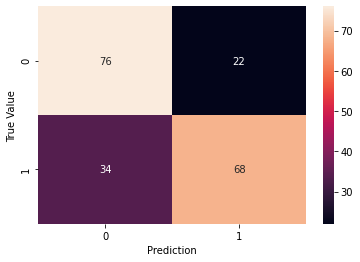

Accuracy: 72.00%
CV Mean Accuracy: 75.20%


In [49]:
# For SupportVectorMachine

svc = SVC(kernel="linear")
accuracy = predictAndVisualize(CLF=svc)
CVacc = crossValidate(svc)

models_acc = models_acc.append({"Model":"SVC","Accuracy":accuracy,"CV Accuracy":CVacc},ignore_index=True)

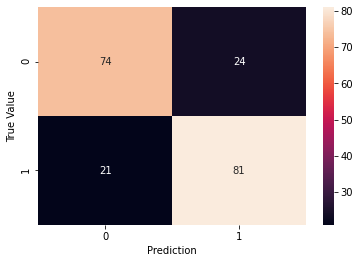

Accuracy: 77.50%
CV Mean Accuracy: 83.20%


In [50]:
# For MLPclassifier

mlpCLF = MLPClassifier(activation="tanh",solver="lbfgs", max_iter=1000)
accuracy = predictAndVisualize(CLF=mlpCLF)
CVacc = crossValidate(mlpCLF)

models_acc = models_acc.append({"Model":"MLP Classifier","Accuracy":accuracy,"CV Accuracy":CVacc},ignore_index=True)

In [51]:
models_acc

,Model,Accuracy,CV Accuracy
0,KNN,0.800,0.829
1,Decision Tree,0.830,0.840
2,Random Forest,0.825,0.852
3,Logistic Regression,0.860,0.756
4,Gaussian NB,0.745,0.729
5,SVC,0.720,0.752
6,MLP Classifier,0.775,0.832


# **Conclusion**

Here looking at accuracy score of model by simple train and test sets, **Logistic Regression** peformed good.

But after getting cross validation accuracy **Random Forest** and **Decision Tree** are better choice for this dataset as they have almost same accuracy.

In [58]:
# # For creating requirements.txt

# libs = [pd,matplotlib,sklearn,sb,imblearn]
# text = ""
# for lib in libs:
#     text+=lib.__name__+"=="+lib.__version__+"\n"

# with open("reqirements.txt","w") as fp:
#     fp.write(text)